<h1>Predicting game prices</h1>
<h5 style="margin-left: 2rem">By: Elad Ben-Haim, Shalev Hadar</h5>
<br/>
<br/>

<h4>נושא המחקר</h4>
<table dir="rtl">
    <tr>
        <th>
            נושא המחקר
        </th>
        <th>
            פירוט הנושא
        </th>
    </tr>
    <tr>
        <td>
        האם ניתן לחזות מחיר של משחק בעוד x זמן?
        </td>
        <td>
        מתי הכי ישתלם לקנות את המשחק בעתיד
        </td>
    </tr>
    <tr>
        <td>
        האם ניתן לחזור מתי למוכר הכי משתלם לעשות מבצע על המשחק?
        </td>
        <td>
        מתי הכי כדאי למוכר לעשות מבצע כדי להביא עוד שחקנים ולהמשיך למכור עם הרווח הגדול ביותר
        </td>
    </tr>
</table>
<br/>

<br/>

<h4>נתוני המחקר ודרכי ניתוח</h4>
<table dir="rtl">
    <tr>
        <th>
            נתוני המחקר & דרכי ניתוח
        </th>
        <th>
             ואיך ננתח אותם
        </th>
    </tr>
    <tr>
        <td>
		פירוט הנתונים: פרטים פיננסיים הוא נמכר בזמן X ואז לחזות בכמה הוא ימכר בזמן Y ובנוסף פרטים על המשחק - כמו שם, ז'אנר פופולריות וכו'.
        </td>
        <td>
            <p style="font-size: 1.1rem">
                נשתמש ב-Crawling על אתר isThereAnyDeal(Fig.3)<br/>
                כדי לא לקבל הודעת שגיאה על שימוש יתר, נשתמש ב-PROXY כדי לא להחסם ע"י isThereAnyDeal<br/>
                ונייבא משם את כל המידע הדרוש כדי לחזות את המחיר של משחק בעוד X זמן מסוים.<br/>
                ראינו שלכל משחק קיים באיזור ה1000+ (Fig.2) רשומות של log (Fig.1) של המחיר שלו ביחס לזמן, ולחנות בה הוא נמכר ואת העלייה\ירידה במחיר של המשחק ביחד ללוג הקודם.<br/>
                בעזרת STEAM API נוציא את ז'אנר המשחק, שנת הייצור ועוד פרטים מורכבים יותר על המשחק עצמו<br/>
                ולבסוף נצרף לכל לוג את פרטי המשחק ונקבל Dataset בגודל n = כמות המשחקים, x = כמות הלוגים, כלומר n*x<br/>
                אנחנו מעוניינים כרגע לקחת את 100 המשחקים הראשונים ולפי מה שראינו כמות הלוגים בדרך כלל היא לפחות 1000 אז נקבל בסביבות ה100,000+ רשומות.<br/>
            </p>
        </td>
    </tr>
    <tr>
        <td>
		דרכי ניתוח: נשתמש בכלים שלמדנו במהלך הקורס לעבד\ללמוד מהנתונים כמה מידע שאנו צריכים למטרה זו
        </td>
        <td>
            <p style="font-size: 1.1rem">
                ננתח את הDataFrame, בעזרת טבלאות יחסי משתנים, סטטיסטיקות, ולבסוף ננסה ללמד מכונה שתחזה את התאריך של המחיר הזול ביותר בשנה מסוימת, ואת המחיר אשר יביא את כמות המכירות הגדול ביותר
            </p>
        </td>
    </tr>
</table>
<br/>
<table style="width:100%;grid-template-rows: 1fr 1fr 1fr;">
<tr>
    <td>
        <figure>
            <img src="images\log_table_for_ds3.png" alt="Is there any deal log table">
            <figcaption>Fig.1 - The main crawled data source</figcaption>
        </figure>
    </td>
    <td>
        <figure>
            <img src="images\number_of_logs_for_ds3.png" alt="Example for number of rows in a typical game">
            <figcaption>Fig.2 - Example for number of rows in a typical game (Dark souls 3) </figcaption>
        </figure>
    </td>
    <td>
        <figure>
            <img src="images\is_there_any_deal_site_example_ds3.png" alt="Is there any deal game page">
            <figcaption>Fig.3 - IsThereAnyDeal game page</figcaption>
        </figure>
    </td>
</tr>

<a id="table-of-contents"></a>
## Table-of-Content:
* [1. Imports](#1)
* [2. Global functions](#2)
* [3. Crawling + Analyzing](#3)
    * [3.1. Defining proxies for scraping](#3.1)
        * [3.1.1. Get proxy list response html website](#3.1.1)
        * [3.1.2. Scrape proxy ip addresses](#3.1.2)
        * [3.1.3. Get request using the proxies](#3.1.3)
    * [3.2. Start Scraping Sites](#3.2)
        * [3.2.1. Get list of 100 top trending games](#3.2.1)
        * [3.2.2. Finished! (Saved DataFrame to csv)](#3.2.2)
        * [3.2.3. Fix steam api raw data](#3.2.3)
        * [3.2.4. Get price history for each game + 3.2.5 get num of players at that time](#3.2.4)
* [4. Exploratory Data Analysis](#4)
    * [4.1. Most frequent shop](#4.1)
    * [4.2. Metacritic score per total steam recommendations](#4.2)
    * [4.3. Regular Price / Number of dlcs available](#4.3)
    * [4.4. Metacric score / Regular Price](#4.4)
    * [4.5. Game Price / Publisher](#4.5)
    * [4.6. Regular price / Genre](#4.6)
    * [4.7. Controller support Pie chart](#4.7)
    * [4.8. Platforms supported Pie chart](#4.8)
    * [4.9. Sales of 5 top games over time (the ones which have most history)](#4.9)
    * [4.10. Price drop of the top over a year with holidays in mind](#4.10)
* [5. Advanced Analysis and Machine Learning](#5)
    * [5.1. Feature correlation](#5.1)
    * [5.2. Linear Regression Model](#5.2)
* [External Links](#external_resources)

<a id="1"></a>
<h3>1. Imports</h3>
<a href="#table-of-contents">^back to top^</a>

In [576]:
import requests
import bs4
from bs4 import BeautifulSoup
import random
import itertools
import re
import pandas as pd
from pandas import DataFrame
import time
import datetime
import locale
import os.path
import json
import ast
import dateutil.parser
from deep_translator import GoogleTranslator
import pickle
import seaborn as sns
from collections import OrderedDict
import matplotlib as plt
from matplotlib import pyplot
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics, preprocessing
from sklearn.metrics import r2_score
import sklearn
from tqdm.notebook import tqdm
tqdm().pandas()

0it [00:00, ?it/s]

<a id="2"></a>
<h3>2. Global functions</h3>
<a href="#table-of-contents">^back to top^</a>

In [606]:
class list(list):
    def filter(self, fn):
        return list(filter(fn, self))
    def map(self, fn):
        return list(map(fn, self))
    def forEach(self, fn):
        for i in self.__iter__():
            fn(i)

def save_df(df: DataFrame, file_name: str):
    df.to_csv(f'results/{file_name}')

def load_df(file_name: str):
    return pd.read_csv(f'results/{file_name}')

def get_server_response(url: str, proxy: str = None, params: list = None) -> requests.Response:
    time.sleep(1)
    if proxy is not None:
        return requests.get(url, proxies={"http": proxy, "https":proxy}, params=params)
    else:
        return requests.get(url, params=params)

def get_response_as_beautiful_soup(req: requests.Response) -> BeautifulSoup:
    return BeautifulSoup(req.text, 'html.parser')

def cache_json(folder_path: str, id: str, get_function) -> object:
    url = f'./cache/{folder_path}/{id}.json'
    if os.path.isfile(url):
        f = open(url, 'r')
        data = json.load(f)
        f.close()
    else:
        data = get_function(id).json()
        f = open(url, 'a')
        f.write(json.dumps(data))
        f.close()
    return data

def cache_soup(folder_path: str, id: str, get_function):
    url = f'./cache/{folder_path}/{id}.html'
    if os.path.isfile(url):
        f = open(url, 'r')
        soup = BeautifulSoup(f.read(), 'html.parser')
        f.close()
    else:
        res = get_function(id)
        f = open(url, 'a')
        f.write(res.text)
        f.close()
        soup = get_response_as_beautiful_soup(res)
    return soup

def translate(source: str):
    url = './cache/translations.pickle'
    translations = dict()
    if os.path.isfile(url):
        f = open(url, "rb")
        translations = pickle.load(f)
        f.close()
    
    translation = translations.get(source)
    if translation is not None:
        return translation

    translator = GoogleTranslator(source='auto', target='en')
    translation = translator.translate(source)
    translations[source] = translation
    f = open( url, "wb" )
    pickle.dump(translations, f)
    f.close()
    return translation

def get_len(col):
    if callable(getattr(col, '__len__', None)):
        return len(col)
    else:
        return 0

def pluck(key):
    return lambda col: col.get(key) if type(col) is dict else None

def pluckBy(key, okFunction = lambda val: val, errFunction = lambda _: None):
    return lambda col: okFunction(col.get(key)) if type(col) is dict else errFunction(None)

def parse_datetime(datetime_str: str):
    try:
        return dateutil.parser.parse(datetime_str)
    except:
        return dateutil.parser.parse(translate(datetime_str))

def truncate(text: str, max_num_of_letters: int):
    if len(text) > max_num_of_letters:
        return f'{text[:max_num_of_letters]}...'
    else:
        return text



<br/>

<a id="3"></a>
<h2>3. Crawling + Analyzing</h2>
<a href="#table-of-contents">^back to top^</a>

<a id="3.1"></a>
<h4>3.1. Defining proxies for scraping</h4>

<a id="3.1.1"></a>
<h5>3.1.1. Get proxy list response html website</h5>
<h6>get the html as response object instead of getting the html again and again</h6>

In [578]:
# Get the html of the proxy list website
def get_proxy_list_html() -> requests.Response:
    # Website to get free proxies
    return get_server_response('https://free-proxy-list.net/')

In [579]:
proxies_response = get_proxy_list_html()

<a id="3.1.2"></a>
<h5>3.1.2. Scrape proxy ip addresses</h5>
<a href="#table-of-contents">^back to top^</a>
<h6>gets the ip addresses as a list, shuffles them and returns an iterator to cycle through when making scrape requests</h6>

In [580]:
def get_proxy_list() -> itertools.cycle:
    soup = get_response_as_beautiful_soup(proxies_response)
    proxy_soup_list = soup.select('#list > div > div.table-responsive > div > table > tbody > tr')
    proxy_list = list(map(lambda i: i.select('td:nth-child(1)')[0].text + ':' + i.select('td:nth-child(2)')[0].text, proxy_soup_list))
    length = len(proxy_list)
    random.shuffle(proxy_list)
    return itertools.cycle(proxy_list), length

In [581]:
proxy_list, proxy_list_length = get_proxy_list()
current_proxy = next(proxy_list)

<a id="3.1.3"></a>
<h5>3.1.3. Get request using the proxies</h5>
<a href="#table-of-contents">^back to top^</a>

In [582]:
def get_proxied(url: str, params: list = None) -> requests.Response:
    i = 0
    while(i < proxy_list_length / 2):
        try:
            response = get_server_response(url, current_proxy, params=params)
            time.sleep(2)
            return response
        except:
            i += 1
        finally:
            current_proxy = next(proxy_list)

    raise RuntimeError('Half of the proxies provided don`t work.')

<br/>

<a id="3.2"></a>
<h4>3.2. Start Scraping Sites</h4>
<a href="#table-of-contents">^back to top^</a>
<h6>Steps:</h6>
<ol>
<li>Scrape and Crawl list of top 100 trending games</li>
<li>For each game:</li>
<ol>
    <li>
        get the game details from steam API using "appId" scraped either from PC Gaming Wiki or Steam Ladder links
        <ol>
            <li>Get raw data</li>
            <li>Fix and map data relevant</li>
        </ol>
    </li>
    <li>Get entire price history from isThereAnyDeal</li>
    <li>Get Number of players at that date</li>
<ol>
</ol>

In [583]:
is_there_any_deal_url = 'https://isthereanydeal.com'
steam_api_url = 'https://store.steampowered.com/api/appdetails'
steam_charts_player_count_over_time_api = lambda steamId: f' https://steamcharts.com/app/{steam_id}/chart-data.json'

<a id="3.2.1"></a>
<h5>3.2.1. Get list of 100 top trending games</h5>
<a href="#table-of-contents">^back to top^</a>

In [584]:
def get_is_there_any_deal_games_response() -> requests.Response:
    filteredUrl = 'https://isthereanydeal.com/'
    return get_server_response(filteredUrl)

In [585]:
is_there_any_deal_games_response = get_is_there_any_deal_games_response()
print(is_there_any_deal_games_response)

<Response [200]>


In [586]:
def add_game_to_dataframe(df: DataFrame, game: dict) -> DataFrame:
    return df.append(DataFrame([game]), ignore_index=True)

In [587]:
def get_steam_api_game_response(steamId: str) -> requests.Response:
    return get_server_response(steam_api_url, params={'appids': steamId})

In [588]:
def get_steam_charts_player_count(steamId: str) -> requests.Response:
    return get_server_response(steam_charts_player_count_over_time_api(steamId))

In [589]:
def delete_if_exists(d: dict, *keys: list) -> dict:
    for key in keys:
        if d.get(key) is not None:
            del d[key]
    return d

In [590]:
def get_steam_api_game_details(steamId: str) -> dict:
    data = cache_json('steam_api_details', steamId, get_steam_api_game_response)
    if data.get(steamId) is None or data.get(steamId).get('data') is None:
        return {}
    data = data[steamId]['data']

    if data.get('categories') is not None: # GAME ,,,,, [{id:3, name: ACTION}, {id:5, name:ROUGE_LIKE}]
        for category in data['categories']:
            data['category.'+translate(str(category['description']))]=True
        del data['categories']
    
    if data.get('genres') is not None:
        for genre in data['genres']:
            data['genre.'+translate(str(genre['description']))]=True
        del data['genres']
    
    if data.get('developers') is not None:
        for developer in data['developers']:
            data[f'developer.' + developer.strip().replace(' ', '_')]=True
        del data['developers']
    
    if data.get('publishers') is not None:
        for publisher in data['publishers']:
            data[f'publisher.' + publisher.strip().replace(' ', '_')]=True
        del data['publishers']
        
    if data.get('supported_languages') is not None: # <strong>*</strong>English<strong>*</strong>, Japanese, Spanish => ['English', 'Japanese', 'Spanish']
        for language in data['supported_languages']\
                            .replace('<strong>*</strong>', '')\
                            .replace('<br/>', '')\
                            .replace('<br>', '')\
                            .replace('languages with full audio support', '')\
                            .split(','):
            data[f'supported_language.' + language.strip().replace(' ', '_')]=True
        del data['supported_languages']

    return data

<img style="width: 50%" src="images/steam_api_response.png"/>

In [591]:
def get_game_dataframe():
    soup = get_response_as_beautiful_soup(is_there_any_deal_games_response)
    df = DataFrame()
    games = soup.select("#games > div.game")
    game_dict = dict()
    for game in tqdm(games):
        steamId = game.attrs.get('data-steamid')
        if steamId is not None:
            steamId: str
            if 'app' in steamId:
                steamId = steamId.split('/')[1] # app/{steamId}
                title = game.select("div.title > a")[0].text
                history = game.select("div.overview.exp.tgl-hide > a:nth-child(5)")[0].attrs.get('href')
                game_details = get_steam_api_game_details(steamId)
                if game_details == {}: continue
                df = add_game_to_dataframe(df, {'steamId': steamId, 'title': title, 'history_link': is_there_any_deal_url + history, **game_details})
    return df

<a id="3.2.2"></a>
<h5>3.2.2. Finished! (Saved DataFrame to csv)</h5>
<a href="#table-of-contents">^back to top^</a>

In [592]:
games_dataframe = get_game_dataframe()
save_df(games_dataframe, 'games_dataframe.csv')
games_dataframe

  0%|          | 0/100 [00:00<?, ?it/s]

,steamId,title,history_link,type,name,steam_appid,required_age,is_free,controller_support,dlc,...,publisher.Warner_Bros._Interactive_Entertainment,publisher.Feral_Interactive,developer.Ubisoft_Paris,developer.Ubisoft_Annecy,developer.Ubisoft_Milan,developer.Reflections,developer.Ubisoft_Belgrade,genre.Racing,genre.Sports,developer.Codemasters
0,588650,Dead Cells,https://isthereanydeal.com/game/deadcells/hist...,game,Dead Cells,588650,0,False,full,"[1580050, 1451460, 1204130, 1046440, 665380, 1...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1174180,Red Dead Redemption 2,https://isthereanydeal.com/game/reddeadredempt...,game,Red Dead Redemption 2,1174180,0,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1151640,Horizon Zero Dawn™ Complete Edition,https://isthereanydeal.com/game/horizonzerodaw...,game,Horizon Zero Dawn™ Complete Edition,1151640,16,False,full,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1426210,It Takes Two,https://isthereanydeal.com/game/ittakestwo/his...,game,It Takes Two,1426210,0,False,full,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1092790,Inscryption,https://isthereanydeal.com/game/inscryption/hi...,game,Inscryption,1092790,0,False,NaN,[1752910],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,924970,Back 4 Blood,https://isthereanydeal.com/game/backivblood/hi...,game,Back 4 Blood,924970,18,False,full,[1598441],...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,1142710,Total War: WARHAMMER III,https://isthereanydeal.com/game/totalwarwarham...,game,Total War: WARHAMMER III,1142710,0,False,NaN,NaN,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,460930,Tom Clancy's Ghost Recon Wildlands,https://isthereanydeal.com/game/tomclancysghos...,game,Tom Clancy's Ghost Recon® Wildlands,460930,0,False,NaN,"[832700, 573830, 573831, 573832]",...,NaN,NaN,True,True,True,True,True,NaN,NaN,NaN
61,1858570,My Cute Girls Soundtrack,https://isthereanydeal.com/game/mycutegirlssou...,music,My Cute Girls Soundtrack,1858570,0,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [593]:
def drop_columns(df: DataFrame, columns) -> DataFrame:
    return df.drop(columns, axis=1)

def use_val(fun):
    return lambda col: (fun(ast.literal_eval(col)) if type(col) is str else fun(col))


<a id="3.2.3"></a>
<h5>3.2.3. Fix steam api raw data</h5>
<a href="#table-of-contents">^back to top^</a>

In [594]:

def map_steam_api_game_data(ndf: DataFrame) -> DataFrame:
    df = ndf.copy()
    ignored_columns = [
        'type',
        'name',
        'steam_appid',
        'detailed_description',
        'about_the_game',
        'short_description',
        # 'fullgame',
        'header_image',
        'website',
        'pc_requirements',
        'mac_requirements',
        'linux_requirements',
        'legal_notice',
        'price_overview',
        'package_groups',
        'screenshots',
        'achievements',
        'background',
        'content_descriptors',
        'support_info',
        'ext_user_account_notice',
        'reviews',
        'drm_notice'
    ]
    df = drop_columns(df, ignored_columns)

    for (new_col, col) in (('number_of_demos', 'demos'), ('num_of_game_videos', 'movies'), ('num_of_dlc', 'dlc'), ('num_of_packages_game_is_in', 'packages')):
        df[new_col] = df[col].apply(use_val(get_len))
        df = drop_columns(df, col)

    df['metacritic_score'] = df['metacritic'].apply(use_val(pluckBy('score', lambda score: score / 100)))
    df = drop_columns(df, 'metacritic')

    for (new_col, col, key) in (('windows_supported', 'platforms', 'windows'), ('mac_supported', 'platforms', 'mac'), ('linux_supported', 'platforms', 'linux')):
        df[new_col] = df[col].apply(use_val(pluckBy(key, lambda val: val == True, lambda _: False)))
    df = drop_columns(df, 'platforms')
    
    df['total_steam_recommendations'] = df['recommendations'].apply(use_val(pluck('total')))
    df = drop_columns(df, 'recommendations')

    df['release_date'] = df['release_date'].apply(use_val(pluckBy('date', parse_datetime)))

    for col in filter(lambda c: len(c.split('.')) > 1,df.columns):
        df[col].fillna(False, inplace=True)
    return df

<h5 id="3.2.3">3.2.3. Finished! (Saved DataFrame to csv)</h5>
<a href="#table-of-contents">^back to top^</a>

In [595]:
games_joined_with_steam_details = map_steam_api_game_data(games_dataframe)
save_df(games_joined_with_steam_details, 'games_details_data.csv')

<a id="3.2.4"></a>
<h5>3.2.4. Get price history for each game + 3.2.5 get num of players at that time</h5>
<a href="#table-of-contents">^back to top^</a>

In [596]:
pounds_to_usd_conversion_rate = 1.34

In [597]:
def convert_to_usd(price: str) -> float:
    parsed_price = float(re.sub('\$|\£|\s','',price).strip().lstrip())
    
    if ('£' in price):
        parsed_price = parsed_price * pounds_to_usd_conversion_rate

    return parsed_price

In [598]:
def get_game_history_details(steamId: str, history_link: str) -> DataFrame:
    soup = cache_soup('games', steamId, lambda x: get_server_response(history_link))
    player_count = cache_json('steam_charts_player_count', steamId, get_steam_charts_player_count)
    df = DataFrame()
    vals = soup.select("div.lg2.game")
    for val in vals:
        dateText = val.select_one("span.lg2__time-rel").attrs['title']
        date = datetime.datetime.strptime(dateText, '%a, %d %b %Y %H:%M:%S +0000')
        current_player_count = min(player_count, key=lambda x: abs(datetime.datetime.fromtimestamp(x[0] / 1000)-date))[1]
        shop_title = val.select_one('.shopTitle').text.strip()
        regular_price_text = val.select_one('div:nth-child(2) > span.lg2__price').text
        price_now_text = val.select_one('div:nth-child(3) > span.lg2__price').text
        regular_price = convert_to_usd(regular_price_text)
        price_now = convert_to_usd(price_now_text)
        if (regular_price != 0):
            price_change_percentage = price_now / regular_price
        else:
            price_change_percentage = 0
        df = df.append(DataFrame([{'record_date': date, 'player_count': current_player_count, 'shop': shop_title, 'regular_price': regular_price, 'price_now': price_now, 'price_change': price_change_percentage}]))
    return df


In [599]:
def get_games_with_history():
    games_with_history = DataFrame()
    for index, row in tqdm(games_joined_with_steam_details.iterrows(), total=len(games_joined_with_steam_details.index)):
        row_df = DataFrame([row])
        game_history_details = get_game_history_details(row['steamId'], row['history_link'])

        game_history_details['key'] = 1
        row_df['key'] = 1

        cross = row_df.merge(game_history_details, how = 'outer')
        games_with_history = games_with_history.append(cross)
    
    games_with_history.dropna(subset=['shop', 'regular_price'], inplace=True)
    return games_with_history

In [600]:
games_with_history = get_games_with_history()

  0%|          | 0/63 [00:00<?, ?it/s]

In [601]:
def clean_game_history_details(ndf: DataFrame) -> DataFrame:
    df = ndf.copy()
    if (df.get('shop') is not None):
        df.drop(df[df['shop']=='voidu'].index, inplace=True)
        df.drop(df[df['shop']=='Voidu'].index, inplace=True)
    if (df.get('regular_price') is not None):
        df.drop(df[df['regular_price'] == 0].index, inplace=True)

    df['controller_support'].fillna('no', inplace=True)
    df.drop(['key'], axis=1, inplace=True)
    return df

In [602]:
cleaned_games_with_history = clean_game_history_details(games_with_history)

<h3>(3) Crawling + Fixing Finished! (Saved DataFrame to csv)</h3>
<a href="#table-of-contents">^back to top^</a>

In [603]:
save_df(cleaned_games_with_history, 'games_with_history.csv')

In [607]:
cleaned_games_with_history = load_df('games_with_history.csv')
cleaned_games_with_history = cleaned_games_with_history.loc[:, ~cleaned_games_with_history.columns.str.contains('^Unnamed')]

C:\Users\elad1\AppData\Local\Temp/ipykernel_14932/2288290462.py:1: DtypeWarning: Columns (4,94) have mixed types.Specify dtype option on import or set low_memory=False.
  cleaned_games_with_history = load_df('games_with_history.csv')


<a id="4"></a>
<h2>4. Exploratory Data Analysis</h2>
<a href="#table-of-contents">^back to top^</a>

In [608]:
pie_chart_size = 10

<h5>Functions</h5>

In [609]:
def get_frequent_elements(df: DataFrame, col_name: str, num_top_elements: int) -> pd.Series:
    return pd.Series(df[col_name].value_counts()[:num_top_elements].sort_index())

def one_dim_plot(sr: pd.Series, plot_type: str, axis: int = None):
    sr.plot(kind=plot_type, ax=axis, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

def plot_scatter(df: DataFrame, x: str, y: str):
    sns.lmplot(x=x,y=y,data=df,fit_reg=True)

def plot_line(df: DataFrame, x: str, y: str):
    df.plot.line(x=x, y=y)

def plot_frequency(df: DataFrame, col: str, axis=None, num_of_charts=1):
    elm = get_frequent_elements(df, col, 5)
    plt.rcParams['figure.figsize'] = (pie_chart_size*num_of_charts, pie_chart_size)
    if (axis):
        one_dim_plot(elm, 'pie', axis)
    else:
        one_dim_plot(elm, 'pie')

def plot_bar_chart(df: DataFrame, sizeX: int = None, sizeY: int = None):
    if sizeX and sizeY:
        plt.rcParams['figure.figsize'] = (sizeX, sizeY)
    df.plot.bar(rot=0)

def plot_pie_remove_duplicates(df: DataFrame, key: str, axis=None, num_of_charts=1):
    plot_df = df.copy()

    # we need to drop the repeating games (because we want the real average)
    plot_df.drop_duplicates(subset=['steamId'], inplace=True)
    plot_frequency(plot_df, key, axis=axis, num_of_charts=num_of_charts)

def plot_game_price_history(df: DataFrame, steam_id: int, game_title: str, year: int = None, show_holidays = False):
    data = df.copy().filter(['steamId', 'record_date', 'price_change'], axis=1)
    data['price_change'] = 1 - data['price_change']
    data = data[data['steamId'] == steam_id]
    data['record_date'] = pd.to_datetime(data['record_date'], format='%Y-%m-%d %H:%M:%S')
    if year is not None:
        from_date = datetime.datetime(year, 1, 1)
        to_date = datetime.datetime(year+1, 1, 1)
        data = data[data['record_date'] > from_date]
        data = data[data['record_date'] < to_date]
    data.drop('steamId', axis=1, inplace=True)
    data = data.set_index('record_date')
    least_date: datetime.datetime = data.index.min()
    most_date: datetime.datetime = data.index.max()
    holidays = [('Christmas', 12, 25),\
                ('Black Friday', 11, 25),\
                ('Chinese Single\'s Day', 11, 11),\
                ('Steam Summer Sale', 10, 1)]

    data.plot(title=(f'{game_title}, year {year}' if year is not None else game_title)) # Shadow of the tomb raider, year 2017
    if show_holidays:
        for (holiday, month, day) in holidays:
            for i in range (least_date.year, most_date.year + 1):
                pyplot.axvline(x=datetime.datetime(i, month, day),color='m', linestyle="--")
                pyplot.text(datetime.datetime(i, month, day),0,holiday,rotation=90)


def get_n_games_row_count(df: DataFrame, n: int) -> list:
    games = dict(df['steamId'].value_counts().sort_values(ascending=False)[:n])
    games_list = list()
    for (steam_id, count) in games.items():
        games_list.append((steam_id, df[df['steamId']==steam_id].iloc[0]['title'], count))
    return games_list

def plot_regular_price_per_genre(df: DataFrame):
    data = df.copy()
    genre_colums = list(data.columns).filter(lambda x: str(x).startswith('genre.'))
    genre_averages = dict()
    for genre_colum in genre_colums:
        genre_averages[genre_colum] = df[df[genre_colum]==True]['regular_price'].mean() # Average regular price for all rows matching the genre
    averages = list(genre_averages.items())
    averages = sorted(averages, key=lambda k: k[1], reverse=True)
    keys = list(map(lambda item: truncate(item[0].split('.')[1], 10), averages))
    values = list(map(lambda item: item[1], averages))
    plot_bar_chart(DataFrame(values, keys), sizeX=30, sizeY=5)

# Plot out top 5 publishers
# drop duplicate games by steamId
# group by publisher
# select row from publisher
# calculate average price per publisher (sum of regular price divided by the number of games)
# present as bar graph
def plot_average_per_top_5_publisher(df: DataFrame):
    # we need to drop the repeating games (because we want the real average)
    plot_df = df.copy().drop_duplicates(subset=['steamId'])

    publisher_and_average = dict() # {'publisher.mashu': 33.4, 'publisher.fds': 45.5}
    for col in filter(lambda x: str(x).startswith('publisher.'), plot_df.columns):
        publisher_games = plot_df[plot_df[col] == True]
        num_of_games = len(publisher_games.index)
        publisher_and_average[col] = {
            'avg': publisher_games.regular_price.mean(),
            'games_num': num_of_games
        }
    
    top_5_publishers = OrderedDict(sorted(publisher_and_average.items(), key=lambda item: item[1]['games_num'], reverse=True))
    top_5_vals = map(lambda x: x['avg'], list(top_5_publishers.values())[:5])
    top_5_keys = map(lambda x: x.split('.')[1].replace('_', ' '), list(top_5_publishers.keys())[:5])
    plot_bar_chart(DataFrame(top_5_vals, top_5_keys), sizeX=15, sizeY=5)

<a id="4.1"></a>
<h3>4.1. Most frequent shop</h3>
<a href="#table-of-contents">^back to top^</a>

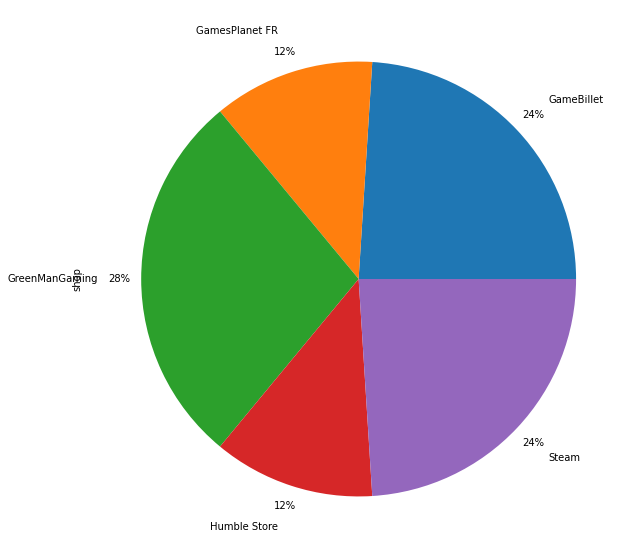

In [610]:
plot_pie_remove_duplicates(df=cleaned_games_with_history, key='shop')

<a id="4.2"></a>
<h3>4.2. Metacritic score per total steam recommendations</h3>
<a href="#table-of-contents">^back to top^</a>
<p>
We can see that more steam recommendations do infact infer a better Metacritic score,
<br/>There is definitely a linear dependency between them
</p>

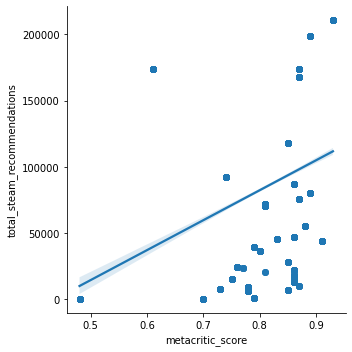

In [611]:
plot_scatter(cleaned_games_with_history, 'metacritic_score', 'total_steam_recommendations')

<a id="4.3"></a>
<h3>4.3. Regular Price / Number of dlcs available</h3>
<a href="#table-of-contents">^back to top^</a>
We can see that when the price is between 20 and 80 dollars the games have more dlcs

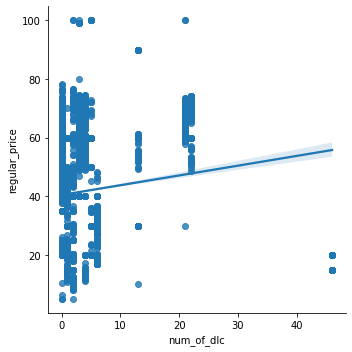

In [612]:
plot_scatter(cleaned_games_with_history, 'num_of_dlc', 'regular_price')

<a id="4.4"></a>
<h3>4.4. Metacric score / Regular Price</h3>
<a href="#table-of-contents">^back to top^</a>
<p>We can see that the regular price is often lined to the metacritic score the game got.</p>

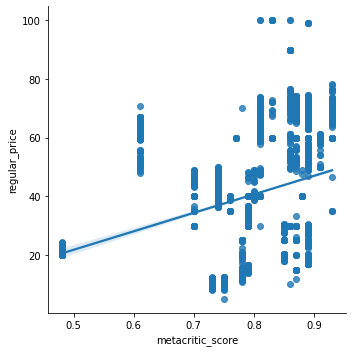

In [613]:
plot_scatter(cleaned_games_with_history, 'metacritic_score', 'regular_price')

<a id="4.5"></a>
<h3>4.5. Game Price / Publisher</h3>
<a href="#table-of-contents">^back to top^</a>
<p>We can see that the most expensive publishers are big companys</p>

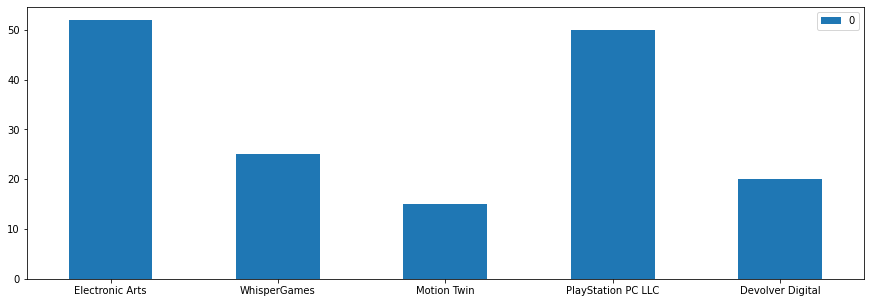

In [614]:
plot_average_per_top_5_publisher(cleaned_games_with_history)

<a id="4.6"></a>
<h3>4.6. Regular price / Genre</h3>
<a href="#table-of-contents">^back to top^</a>
<p>
We can see that the genres Action, adventure and RPG average cost is higher <br/>
probably because the development takes far more time for these genres
</p>

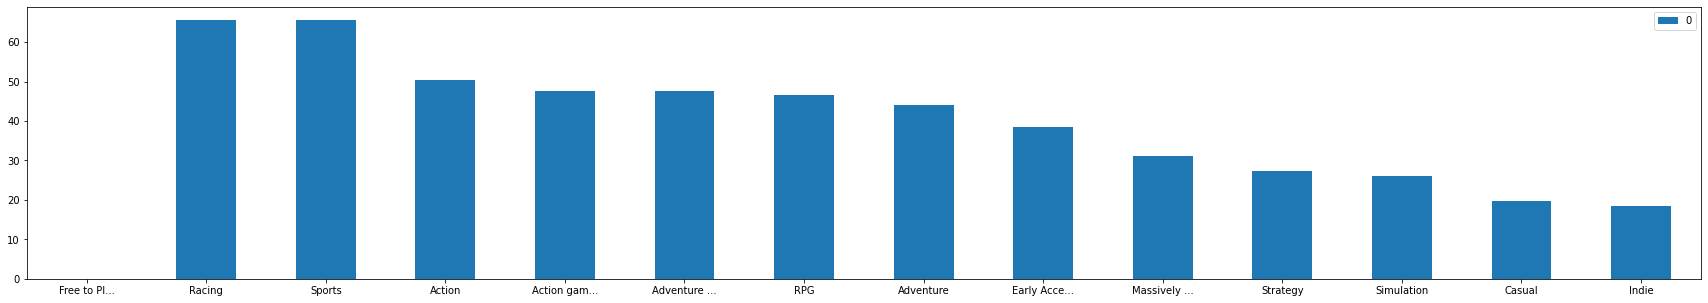

In [615]:
plot_regular_price_per_genre(cleaned_games_with_history)

<a id="4.7"></a>
<h3>4.7. Controller support Pie chart</h3>
<a href="#table-of-contents">^back to top^</a>

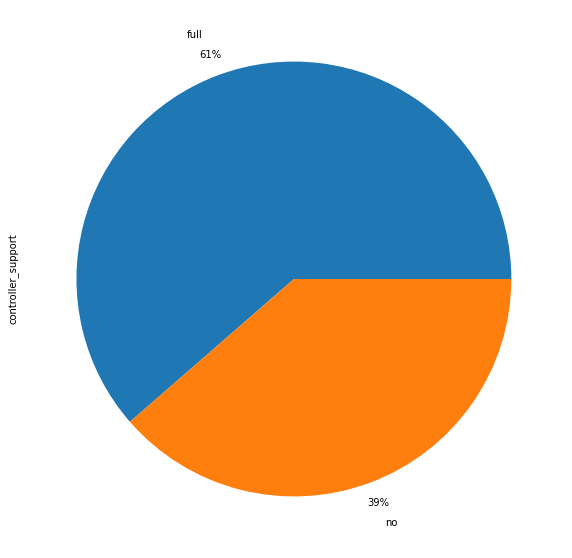

In [616]:
plot_pie_remove_duplicates(cleaned_games_with_history, 'controller_support')

<a id="4.8"></a>
<h3>4.8. Platforms supported Pie chart</h3>
<a href="#table-of-contents">^back to top^</a>
<p>We can see that probably platforms that support Mac also support Linux, and all games support Windows</p>

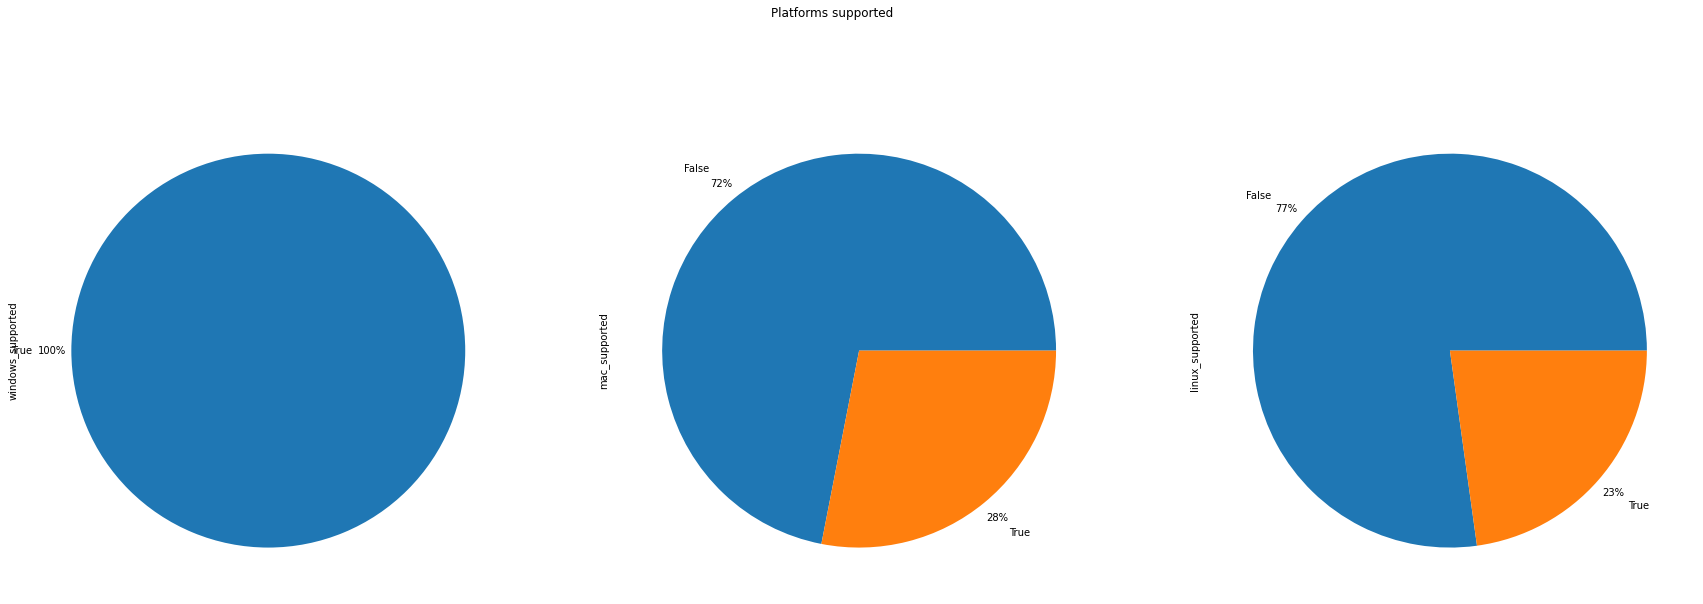

In [617]:
fig, (ax1, ax2, ax3) = plt.pyplot.subplots(1, 3)
fig.suptitle('Platforms supported')
fig.set_size_inches(pie_chart_size*3, pie_chart_size)

plot_pie_remove_duplicates(cleaned_games_with_history, 'windows_supported', ax1, num_of_charts=3)
plot_pie_remove_duplicates(cleaned_games_with_history, 'mac_supported', ax2, num_of_charts=3)
plot_pie_remove_duplicates(cleaned_games_with_history, 'linux_supported', ax3, num_of_charts=3)

<a id="4.9"></a>
<h3>4.9. Sales of 5 top games over time (the ones which have most history)</h3>
<a href="#table-of-contents">^back to top^</a>
<p>We can see that most games start giving discounts of more than 20% after the first year of release,<br/>
then reach 50% on the start of the next year and on the third and fourth reach a max of 80% discount</p>

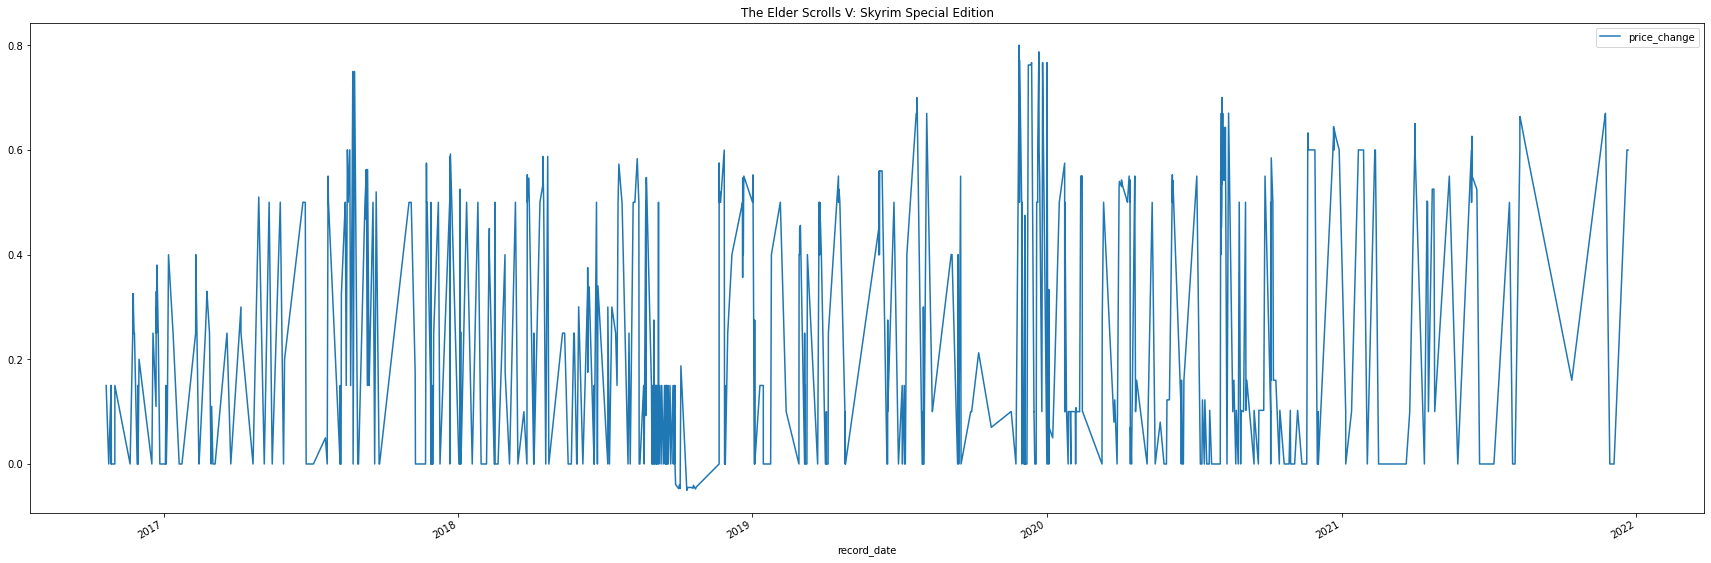

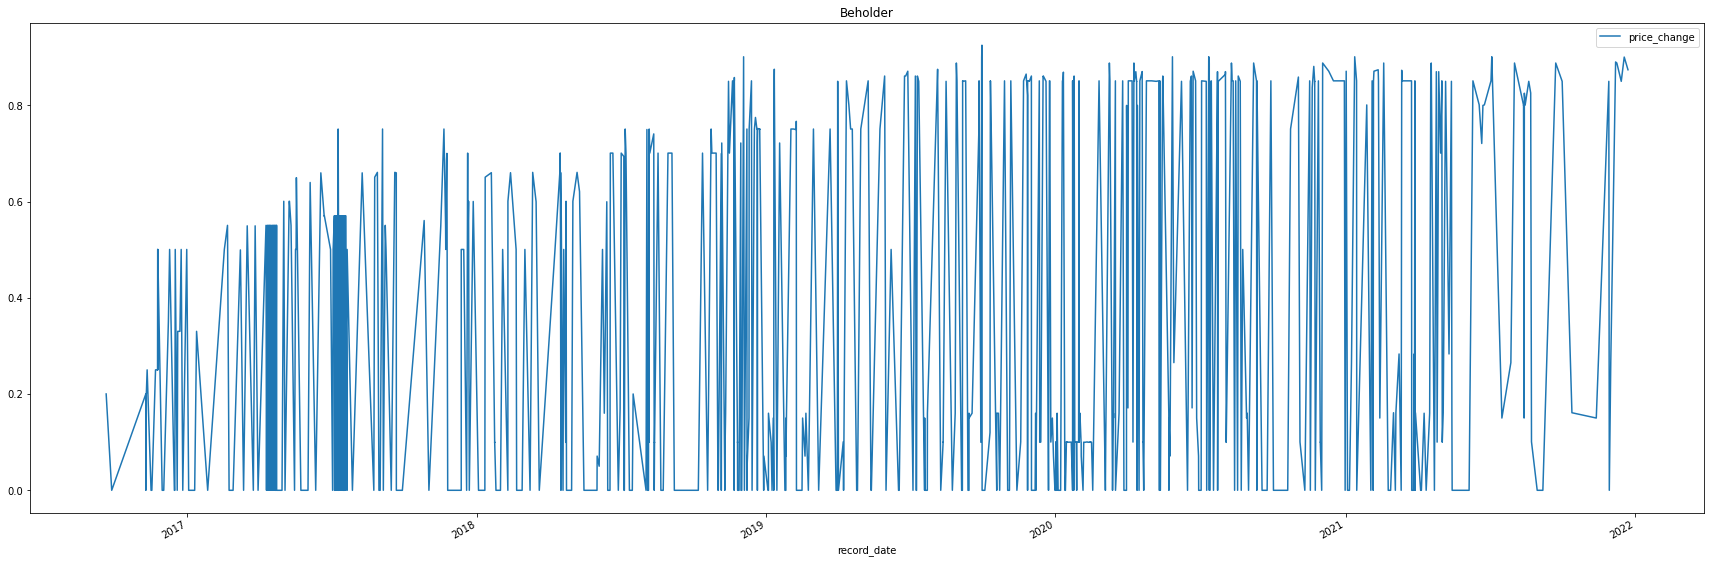

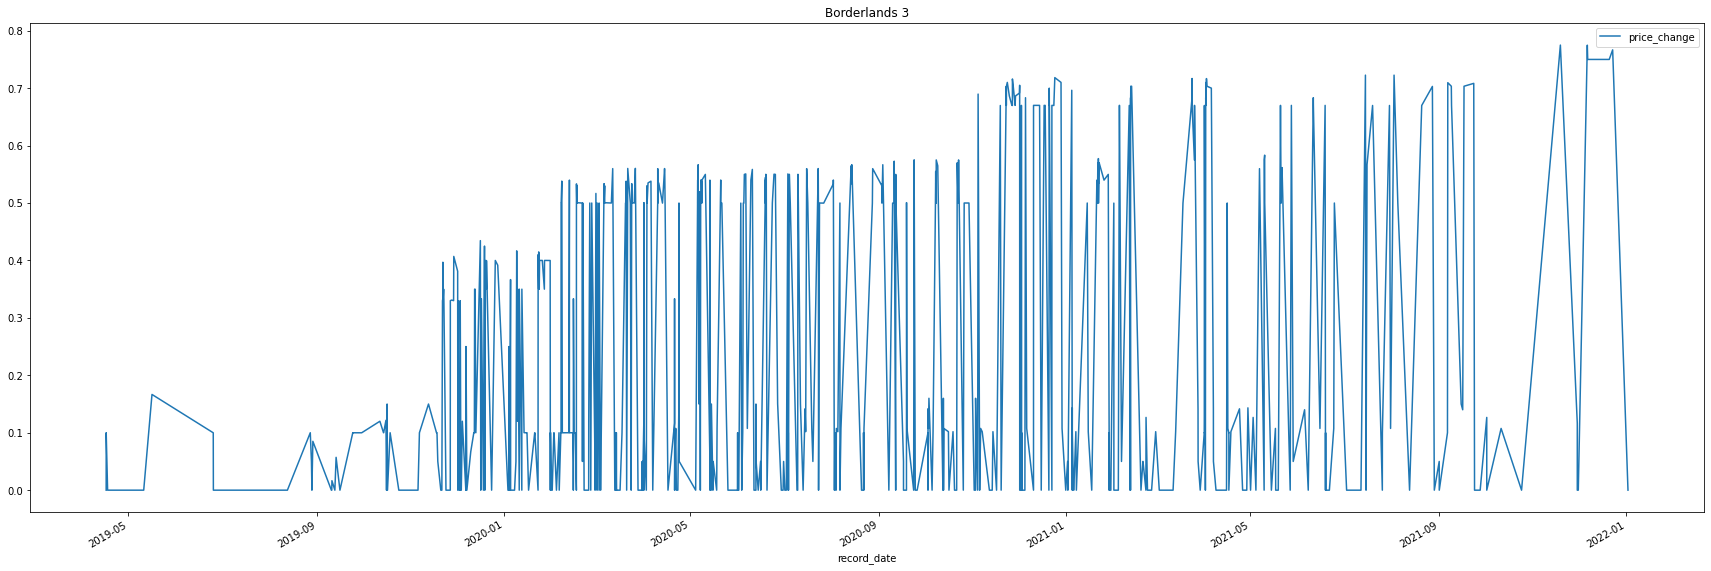

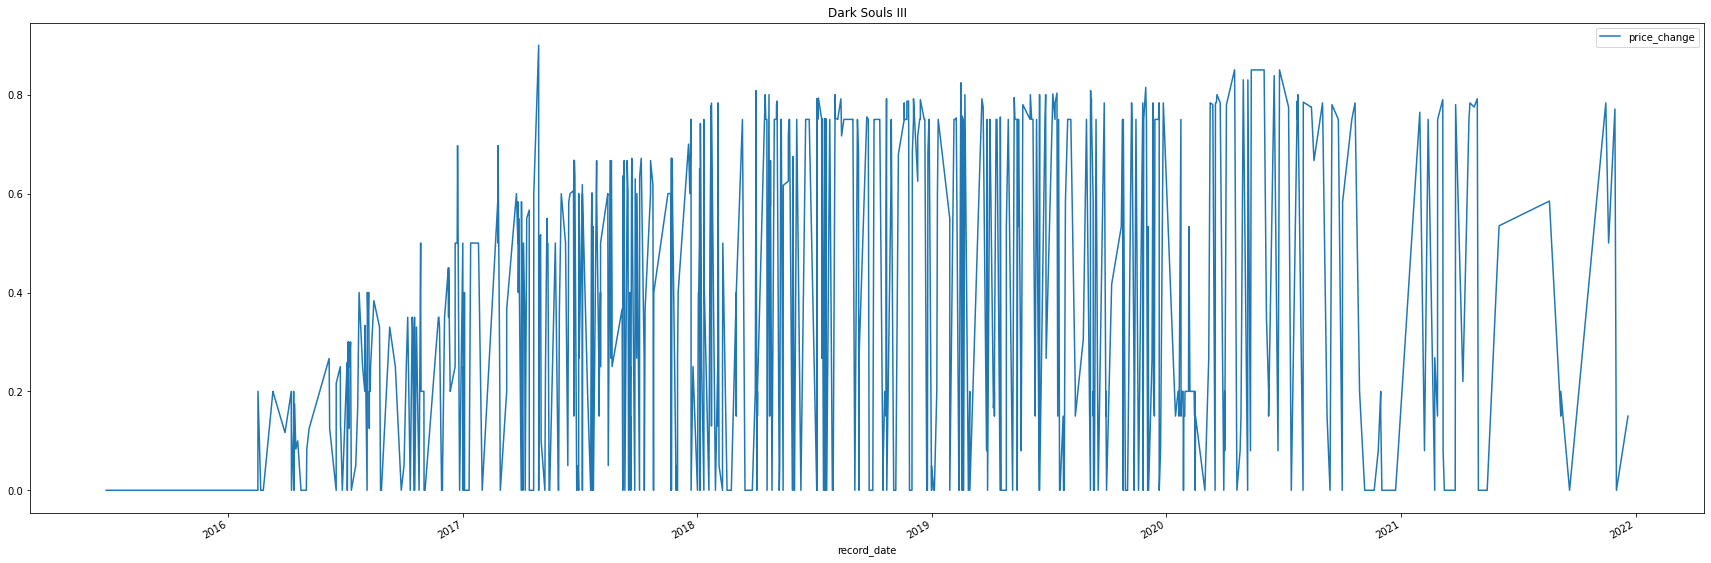

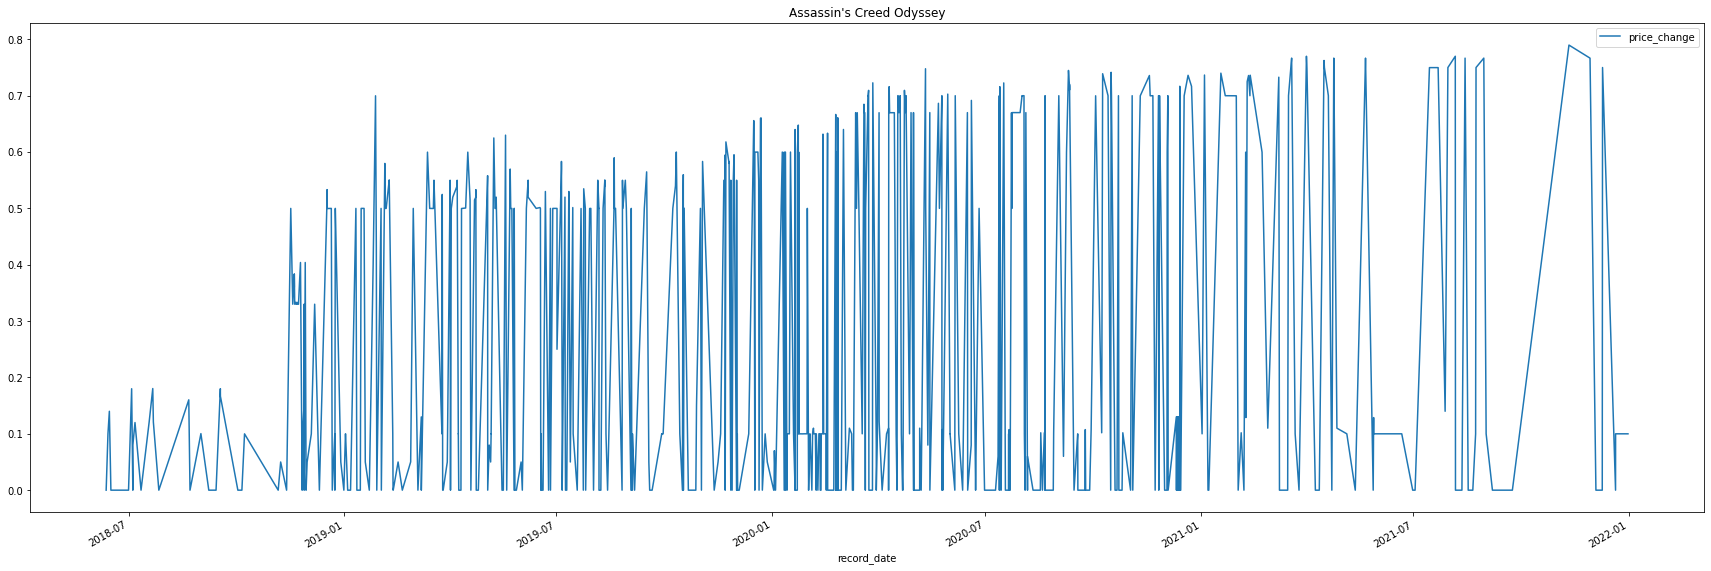

In [618]:
games = get_n_games_row_count(cleaned_games_with_history, 5)
for (steam_id, game_title, _) in games:
    plot_game_price_history(cleaned_games_with_history, steam_id, game_title=game_title)

<a id="4.10"></a>
<h3>4.10. Price drop of the top over a year with holidays in mind</h3>
<a href="#table-of-contents">^back to top^</a>
<p>We also see that on holidays the prices of games drop substantially,<br/>
but like in the last Plot after the second year, the time of year is not a factor anymore
</p>

  0%|          | 0/1 [00:00<?, ?it/s]

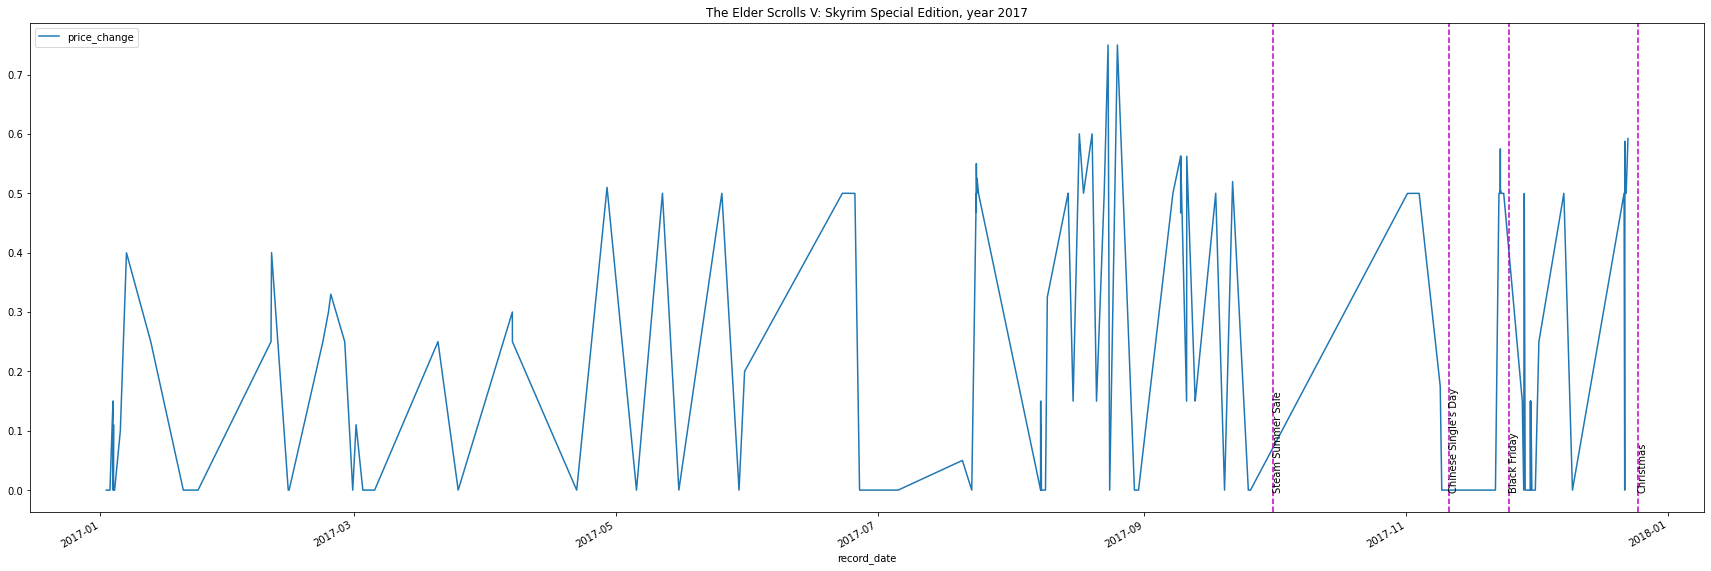

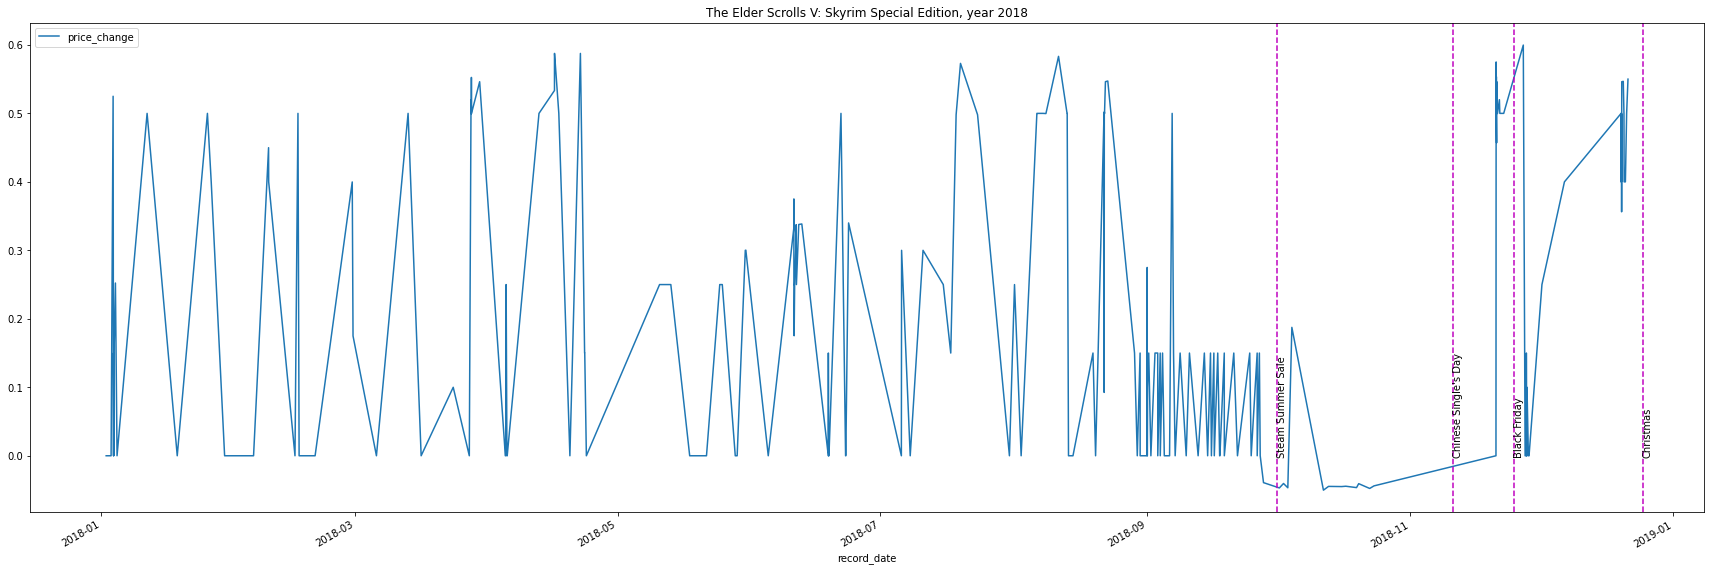

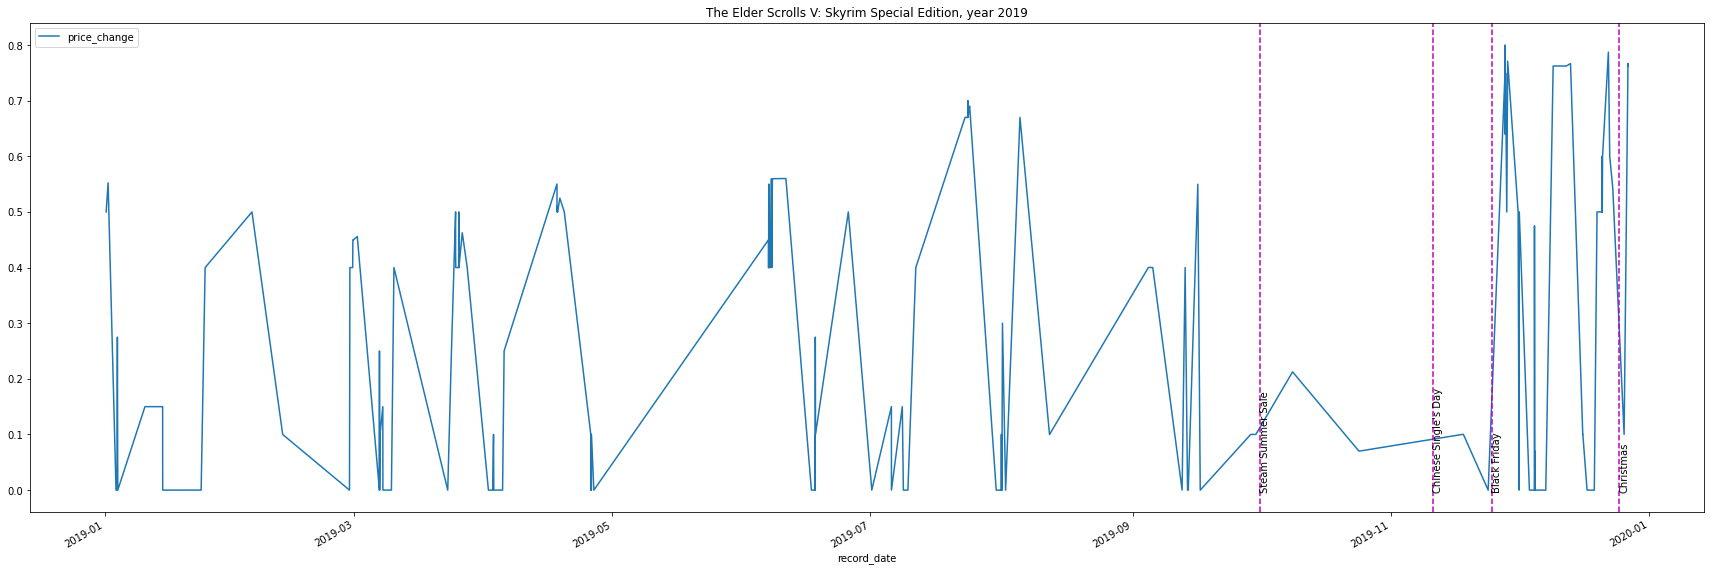

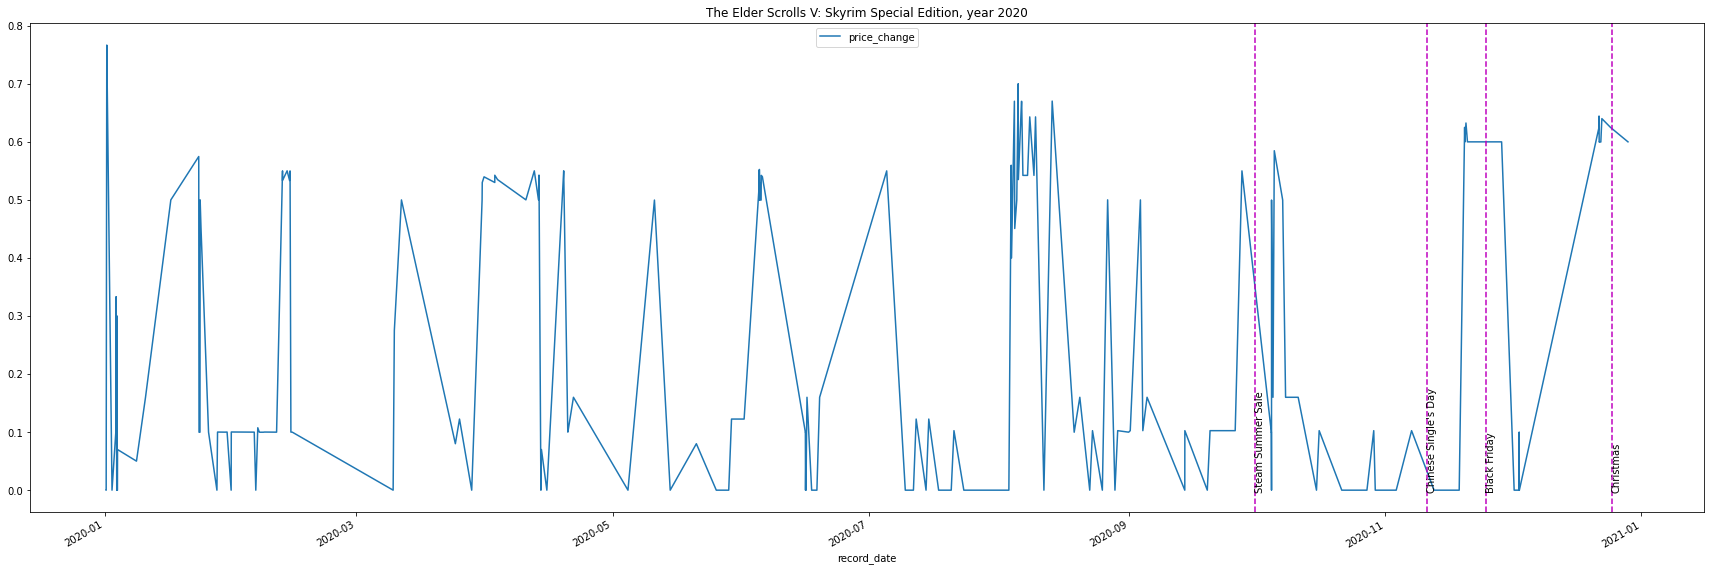

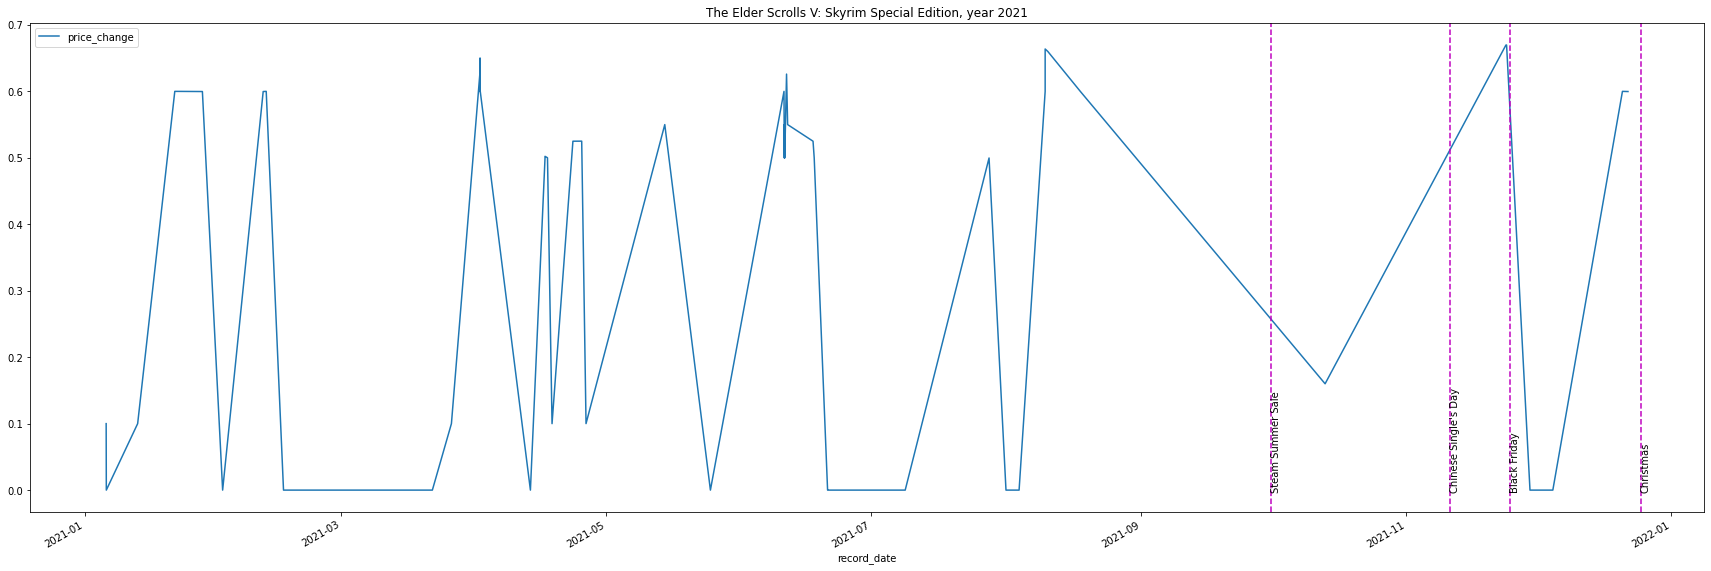

In [619]:
games = get_n_games_row_count(cleaned_games_with_history, 1)
years = list(map(lambda i: i+2017, range(0, 5)))
for (steam_id, game_title, _) in tqdm(games):
    for year in years:
        plot_game_price_history(cleaned_games_with_history, steam_id, game_title=game_title, year=year, show_holidays=True)

<a id="5"></a>
<h2>5. Advanced Analysis and Machine Learning</h2>
<a href="#table-of-contents">^back to top^</a>

<a id="5.1"></a>
<h3>5.1. Feature correlation</h3>
<a href="#table-of-contents">^back to top^</a>

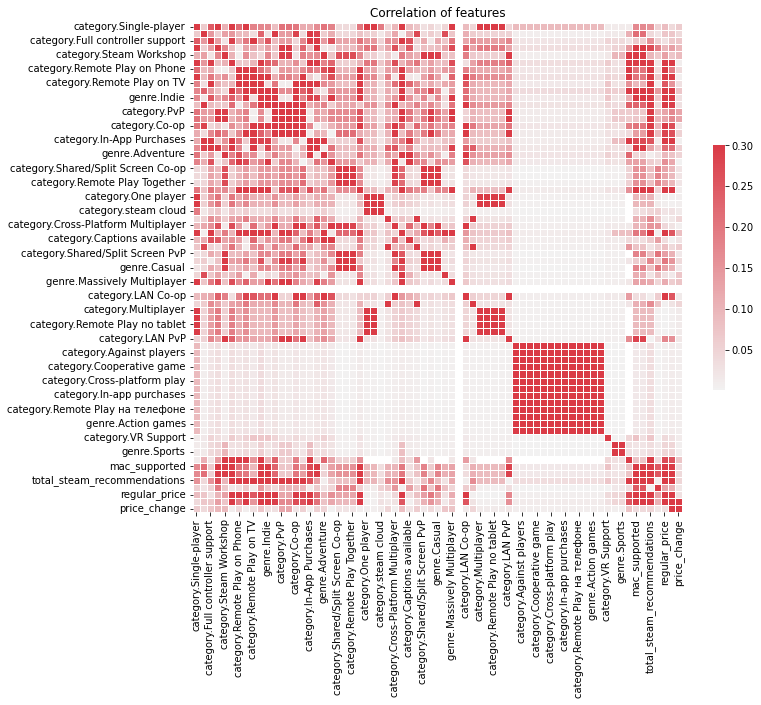

In [620]:
def plot_correlation(ndf: DataFrame):
    df = ndf.copy()
    df = df.loc[:, ~df.columns.str.startswith('supported_language')]
    df = df.loc[:, ~df.columns.str.startswith('publisher')]
    df = df.loc[:, ~df.columns.str.startswith('developer')]
    df.drop(['title', 'windows_supported', 'history_link', 'steamId', 'is_free', 'num_of_dlc', 'number_of_demos', 'num_of_game_videos', 'num_of_packages_game_is_in'], axis=1, inplace=True)
    corr = df.corr().abs()

    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.2)]
    df.drop(to_drop, axis=1, inplace=True)

    mask = np.zeros_like(corr,dtype=bool)
    pyplot.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, cmap=cmap, vmax=.3, mask=mask, center=0, square=True,
                linewidths=.5, cbar_kws={"shrink": .5})
    pyplot.title('Correlation of features')

plot_correlation(cleaned_games_with_history)

<a id="5.2"></a>
<h3>5.2. Linear Regression Model</h3>
<a href="#table-of-contents">^back to top^</a>

In [621]:
def load_dataset(ndf: DataFrame, target_column):
    df = ndf.copy()
    df.drop(['title', 'windows_supported', 'history_link', 'steamId', 'is_free', 'num_of_dlc', 'number_of_demos', 'num_of_game_videos', 'num_of_packages_game_is_in'], axis=1, inplace=True)
    df['controller_support'] = df['controller_support'].apply(lambda row: True if row == 'full' else False)
    df['required_age'] = df['required_age'].astype("category")

    avg_metacritic_score = df['metacritic_score'].mean()
    df['metacritic_score'].fillna(avg_metacritic_score, inplace=True)

    df['total_steam_recommendations'].fillna(0, inplace=True)
    categorical_data = df.select_dtypes(['category'])

    for category_col in categorical_data:
        df.append(pd.get_dummies(data=df[category_col], drop_first=True))
        df.drop(category_col, axis=1, inplace=True)

    df['release_date'] = pd.to_datetime(df['release_date'])
    df['release_date'] = df['release_date'].map(datetime.datetime.toordinal)

    print(df['metacritic_score'].iloc[0])
    if df['metacritic_score'].iloc[0] is None or np.isnan(df['metacritic_score'].iloc[0]):
        print('dropping metacritic_score')
        df.drop(['metacritic_score'], axis=1, inplace=True)

    df['record_date'] = pd.to_datetime(df['record_date'])
    df['record_date'] = df['record_date'].map(datetime.datetime.toordinal)

    df.drop(['fullgame', 'shop'], axis=1, inplace=True)

    Y = df.pop(target_column)

    print(df.columns[df.isnull().any()])
    return df, Y

In [622]:
def train_linear_regression_model(X_train, y_train):
    model = linear_model.LinearRegression()
    return model.fit(X_train, y_train)

def create_price_change_model(ndf) -> dict:
    print(ndf)
    X, y = load_dataset(ndf, 'price_change')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    return {'model': train_linear_regression_model(X_train=X_train, y_train=y_train), 'X_test': X_test, 'y_test': y_test}

def predict_evaluate_performance(model, X_test, y_test):
    predicted = model.predict(X_test)
    return {'predicted': predicted, 'score': r2_score(y_test, predicted)}


In [623]:
price_change_predictions = dict()
price_change_predictions['as_is'] = create_price_change_model(cleaned_games_with_history)
for game in tqdm(cleaned_games_with_history.steamId.unique()):
    price_change_predictions[game] = create_price_change_model(cleaned_games_with_history[cleaned_games_with_history.steamId==game])

       steamId       title                                       history_link  \
0       588650  Dead Cells  https://isthereanydeal.com/game/deadcells/hist...   
1       588650  Dead Cells  https://isthereanydeal.com/game/deadcells/hist...   
2       588650  Dead Cells  https://isthereanydeal.com/game/deadcells/hist...   
3       588650  Dead Cells  https://isthereanydeal.com/game/deadcells/hist...   
4       588650  Dead Cells  https://isthereanydeal.com/game/deadcells/hist...   
...        ...         ...                                                ...   
13161  1134570    F1® 2021   https://isthereanydeal.com/game/f1-2021/history/   
13162  1134570    F1® 2021   https://isthereanydeal.com/game/f1-2021/history/   
13163  1134570    F1® 2021   https://isthereanydeal.com/game/f1-2021/history/   
13164  1134570    F1® 2021   https://isthereanydeal.com/game/f1-2021/history/   
13165  1134570    F1® 2021   https://isthereanydeal.com/game/f1-2021/history/   

      required_age  is_free

  0%|          | 0/57 [00:00<?, ?it/s]

     steamId       title                                       history_link  \
0     588650  Dead Cells  https://isthereanydeal.com/game/deadcells/hist...   
1     588650  Dead Cells  https://isthereanydeal.com/game/deadcells/hist...   
2     588650  Dead Cells  https://isthereanydeal.com/game/deadcells/hist...   
3     588650  Dead Cells  https://isthereanydeal.com/game/deadcells/hist...   
4     588650  Dead Cells  https://isthereanydeal.com/game/deadcells/hist...   
..       ...         ...                                                ...   
683   588650  Dead Cells  https://isthereanydeal.com/game/deadcells/hist...   
684   588650  Dead Cells  https://isthereanydeal.com/game/deadcells/hist...   
685   588650  Dead Cells  https://isthereanydeal.com/game/deadcells/hist...   
686   588650  Dead Cells  https://isthereanydeal.com/game/deadcells/hist...   
687   588650  Dead Cells  https://isthereanydeal.com/game/deadcells/hist...   

    required_age  is_free controller_support       

In [624]:
price_change_predictions['as_is']['performance'] = predict_evaluate_performance(**price_change_predictions['as_is'])

for game in tqdm(cleaned_games_with_history.steamId.unique()):
    price_change_predictions[game]['performance'] = predict_evaluate_performance(**price_change_predictions[game])

  0%|          | 0/57 [00:00<?, ?it/s]

D:\Studies\Introduction-To-Data-Science\DataScienceFinalProject\.venv\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [625]:
print(list(map(lambda x: (x[0], x[1]['performance']['score']), price_change_predictions.items())))

[('as_is', 0.8074531583235371), (588650, -1.2806433715957413), (1174180, 0.9952616962725229), (1151640, 0.9966909516172722), (1426210, 0.9999999947405614), (1092790, 0.9487389136976382), (1243690, 1.0), (1030840, 0.9974366867159804), (1259420, 0.9907741053260094), (1451460, -4.006777851523338), (1328670, 0.8151156405114086), (1172380, -8.725420062398708), (753640, 1.0), (1222140, 0.9964215912436482), (374320, 0.9910652572788075), (1466860, -32.087869367388706), (361280, 0.996567001852062), (367520, 1.0), (275850, 0.9953133759368011), (257350, 0.997289176829554), (475550, 0.9970978654765051), (632360, 0.9806687671967761), (286160, 0.9933197384763985), (1147550, 0.9583898244938582), (1135260, 0.9672279605203183), (686810, 0.9793410570359989), (1140290, 0.9986147227269323), (397540, 0.9960231492899401), (261550, 0.9988224343123886), (1252330, 0.9999874246585955), (1325200, -0.8406426863461804), (1196590, 0.9964635133218256), (1088850, nan), (228280, 0.9992395772708337), (391220, 0.9463902

<a id="external_resources"></a>
<h2>External Resources Used</h2>
<a href="#table-of-contents">^back to top^</a>

* Scraped Sites
	* <a href="https://isthereanydeal.com/game/reddeadredemptionii/info/"><b>Is-There-Any-Deal website - For scraping cost history and more financial details</b></a>
	* <a href="https://store.steampowered.com/api/appdetails"><b>Steam API for Game Metadata - https://store.steampowered.com/api/appdetails?appids=1091500M</b></a>
	* <a href="https://steamcharts.com"><b>steamcharts.com - Site that tracked the amount of players over time of a game, used a request url i got from devtools network (because html just shows the response of the request)</b></a>
* General
	* <a href="https://pandas.pydata.org/docs/index.html"><b>Pandas Documentation</b></a>
	* <a href="https://seaborn.pydata.org"><b>Seaborn Documentation</b></a>
	* <a href="https://scikit-learn.org/stable/modules/classes.html"><b>Scikitlearn API</b></a>
	* <a href="http://jsonviewer.stack.hu/"><b>Viewing response json</b></a>
* Scraping
	* <a href="https://www.geeksforgeeks.org/web-scraping-without-getting-blocked/"><b>Using Proxies to avoiding getting blocked</b></a>
	* <a href="https://wiki.teamfortress.com/wiki/User:RJackson/StorefrontAPI#App_info"><b>Steam StoreFront API</b> Limited to 100,000 requests per day, and no more than 10 per second</a>
	* <a href="https://www.programiz.com/python-programming/json">Using json serialization and parsing</a>
	* <a href="https://www.geeksforgeeks.org/callable-in-python/">Check if object is callable</a>
* EDA
	* <a href="https://www.laurivan.com/convert-timestamp-to-datetime-for-pandas-dataframe/">Convert timestamp to datetime</a>
* Advanced Analysis
* Stack Overflow
	* <a href="https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value">Sort dictionary by value</a>
	* <a href="https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib">Set Figure size</a>
	* <a href="https://stackoverflow.com/questions/43822349/drop-column-that-starts-with/43822392">Drop column that starts with</a>
	* <a href="https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on">Drop all columns which are 95% correlated</a>
	* <a href="https://stackoverflow.com/questions/12141150/from-list-of-integers-get-number-closest-to-a-given-value">From list of integers, get number closest to a given value</a>
	* <a href="https://stackoverflow.com/questions/5268404/what-is-the-fastest-way-to-check-if-a-class-has-a-function-defined">Check if function is defined</a>
	* <a href="https://stackoverflow.com/questions/3694487/in-python-how-do-you-convert-seconds-since-epoch-to-a-datetime-object">In Python, how do you convert seconds since epoch to a `datetime` object?</a>
	* <a href="https://stackoverflow.com/questions/37494983/python-fromtimestamp-oserror">Python fromtimestamp OSError</a>
	* <a href="https://stackoverflow.com/questions/41985993/tqdm-show-progress-for-a-generator-i-know-the-length-of">tqdm show progress for a generator I know the length of</a>
	* <a href="https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown">How to reference a IPython notebook cell in markdown?</a>
